Reference
- "Numerical Methods for Engineers" Steven C. Chapra, and Raymond P. Canale

In [157]:
import cmath # library for complex number
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

### Problem

For each of the following polynomials:

- Apply either the Muller's method or the Bairstow's method to find all real or complex roots
- Analyze and contrast performance between the two methods
- Plot the functions to choose root guesses appropriately.
- You can apply any simplifications you deem appropriate prior to applying the numerical methods.

1. $f(x) = x^3 - x^2 + 2x - 2$

2. $f(x) = 2x^4 + 6x^2 + 8$

3. $f(x) = -2 + 6.2x - 4x^2 + 0.7x^3$

4. $f(x) = x^4 - 2x^3 + 6x^2 - 2x + 5$


In [158]:
# note: [roots of polynomials]
# Muller's method, Bairstow's method

# only for polynomials
# determine all real and complex roots (nth-order, n-th root)
# possibly divergent


# note
# 1. For an nth-order equation, there are n real or complex roots. 
#      It should be noted that these roots will not necessarily be distinct.
# 2. If n is odd, there is at least one real root.
# 3. If complex roots exist, they exist in conjugate pairs

### Answer

1. define functions

In [159]:
# Muller's method
def muller(f, xr, h, eps, maxit):
    """
    Implements pseudocode for Muller's method in the figure 7.4 from the textbook
    
    Notice this routine is set up to take a single initial nonzero guess
      that is then perturbed to develop the other two guesses
    """
    x2 = xr
    x1 = xr + h * xr
    x0 = xr - h * xr
    i = 0
    while True:
        i += 1
        # find the related parabola
        h0 = x1 - x0
        h1 = x2 - x1
        d0 = (f(x1) - f(x0)) / h0
        d1 = (f(x2) - f(x1)) / h1
        a = (d1 - d0) / (h1 + h0)
        b = a * h1 + d1
        c = f(x2)
         # the squred root can be complex number
        rad = cmath.sqrt(b * b - 4 * a * c)
        if abs(b + rad) > abs(b - rad): # abs can be used to calculate modulus of complex number
            den = b + rad
        else:
            den = b - rad
        
        dxr = -2 * c / den
        xr = x2 + dxr
        fr = f(xr)
        epsilon_a = abs(dxr/xr) * 100
        print('iteration: {}, xr: {}, fr: {}, epsilon_a: {}'.format(
        i, xr, fr, epsilon_a))
        
        if (epsilon_a < eps or i >= maxit):
            break
            
        x0, x1, x2 = x1, x2, xr
    
    print('The approximate root is: {}'.format(xr))
    return xr

In [160]:
def plot(f, x_range):
    """
    This function implements a plot for the function based on given range of x
    """
    x = list(x_range)
    y = [f(i) for i in x]

    plt.figure(figsize = (6, 3))
    plt.plot(x, y, 'bo--')
    #plt.xlim(0, 20)
    plt.xticks(x)
    plt.title('Graph of Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    #plt.legend(loc='lower right')
    plt.grid()

2. implement calculations

2.1. $f(x) = x^3 - x^2 + 2x - 2$

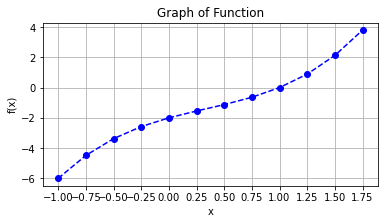

In [161]:
def f1(x):
    return x ** 3 - x ** 2 + 2 * x - 2

plot(f1, np.arange(-1, 2, 0.25))
# total 3 roots, one real root

In [162]:
x1 = muller(f=f1, xr=1, h=0.1, eps=0.00001, maxit=50)

iteration: 1, xr: (1+0j), fr: 0j, epsilon_a: 0.0
The approximate root is: (1+0j)


In [175]:
x2 = muller(f=f1, xr=1j, h=0.1, eps=0.00001, maxit=50)

iteration: 1, xr: (0.009210301984144196+1.4258043178457898j), fr: (-0.004916856362331412-0.0728358843968393j), epsilon_a: 29.870510712210745
iteration: 2, xr: (-0.00038717505419782333+1.4141063889526313j), fr: (0.0012450774485328608+0.0015242943299100808j), epsilon_a: 1.0700182105942153
iteration: 3, xr: (-2.649203913208118e-07+1.4142139895849786j), fr: (2.2680203168867763e-06-9.595397636452674e-07j), epsilon_a: 0.028396940881455716
iteration: 4, xr: (5.462698732421121e-13+1.4142135623728231j), fr: (-2.9543034685275416e-12-4.574118861455645e-13j), epsilon_a: 3.554527597975918e-05
iteration: 5, xr: (-2.054600410144467e-17+1.4142135623730951j), fr: (4.440892098500626e-16-4.440892098500626e-16j), epsilon_a: 4.3149774572525345e-11
The approximate root is: (-2.054600410144467e-17+1.4142135623730951j)


In [176]:
x3 = (abs(x2)) ** 2 / x2
x3

(-2.0546004101444674e-17-1.4142135623730954j)

In [177]:
# check the results using python library
coeff = [1, -1, 2, -2]
np.roots(coeff)

array([4.85722573e-16+1.41421356j, 4.85722573e-16-1.41421356j,
       1.00000000e+00+0.j        ])

2.2. $f(x) = 2x^4 + 6x^2 + 8$

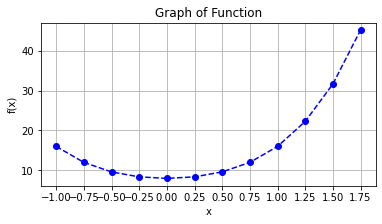

In [178]:
def f2(x):
    return 2 * (x ** 4) + 6 * (x ** 2) + 8

plot(f2, np.arange(-1, 2, 0.25))
# total 4 roots, no real root

In [179]:
x1 = muller(f = f2, xr = 1, h = 0.1, eps = 0.00001, maxit = 50)

iteration: 1, xr: (0.4428412874583795-0.7599187455133491j), fr: (5.096690716234409-3.011566459965914j), epsilon_a: 107.13431680111604
iteration: 2, xr: (0.349279094352047-1.0507154230775528j), fr: (2.959162972421309-1.5207981134001605j), epsilon_a: 27.588901837102114
iteration: 3, xr: (0.379196445384883-1.3071705268523597j), fr: (1.5428802533702397+0.2573733582164772j), epsilon_a: 18.970083364017135
iteration: 4, xr: (0.5058203469463887-1.337165659303957j), fr: (-0.15769512891941062+0.1740033126932854j), epsilon_a: 9.102167637664174
iteration: 5, xr: (0.49971223543631565-1.3225641519271782j), fr: (0.005674351514046272-0.002835966789698219j), epsilon_a: 1.119491792634283
iteration: 6, xr: (0.49999950259281933-1.3228753247271878j), fr: (8.714149741351207e-06-1.9992383455402774e-06j), epsilon_a: 0.029945872316834314
iteration: 7, xr: (0.4999999999984621-1.322875655529763j), fr: (3.4930280889966525e-11-2.731592729787735e-11j), epsilon_a: 4.223995248548219e-05
iteration: 8, xr: (0.5-1.32287

In [180]:
x2 = (abs(x1)) ** 2 / x1
x2

(0.5000000000000001+1.3228756555322956j)

In [181]:
x3 = muller(f = f2, xr = -1, h = 0.1, eps = 0.00001, maxit = 50)

iteration: 1, xr: (-0.4428412874583795-0.7599187455133491j), fr: (5.096690716234409+3.011566459965914j), epsilon_a: 107.13431680111604
iteration: 2, xr: (-0.349279094352047-1.0507154230775528j), fr: (2.959162972421309+1.5207981134001605j), epsilon_a: 27.588901837102114
iteration: 3, xr: (-0.379196445384883-1.3071705268523597j), fr: (1.5428802533702397-0.2573733582164772j), epsilon_a: 18.970083364017135
iteration: 4, xr: (-0.5058203469463887-1.337165659303957j), fr: (-0.15769512891941062-0.1740033126932854j), epsilon_a: 9.102167637664174
iteration: 5, xr: (-0.49971223543631565-1.3225641519271782j), fr: (0.005674351514046272+0.002835966789698219j), epsilon_a: 1.119491792634283
iteration: 6, xr: (-0.49999950259281933-1.3228753247271878j), fr: (8.714149741351207e-06+1.9992383455402774e-06j), epsilon_a: 0.029945872316834314
iteration: 7, xr: (-0.4999999999984621-1.322875655529763j), fr: (3.4930280889966525e-11+2.731592729787735e-11j), epsilon_a: 4.223995248548219e-05
iteration: 8, xr: (-0.5

In [182]:
# based on properties of conjugate complex numbers
x4 = (abs(x3)) ** 2 / x3
x4

(-0.5000000000000001+1.3228756555322956j)

In [183]:
# check the results using python library
coeff = [2, 0, 6, 0, 8]
np.roots(coeff)

array([-0.5+1.32287566j, -0.5-1.32287566j,  0.5+1.32287566j,
        0.5-1.32287566j])

2.3. $f(x) = -2 + 6.2x - 4x^2 + 0.7x^3$

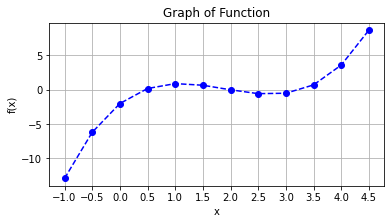

In [184]:
def f3(x):
    return -2 + 6.2 * x - 4 * (x ** 2) + 0.7 * (x ** 3)

plot(f3, np.arange(-1, 5, 0.5))
# total 3 roots, 3 real roots

In [185]:
x1 = muller(f = f3, xr = 0.5, h = 0.1, eps = 0.00001, maxit = 50)

iteration: 1, xr: (0.4357086187008654+0j), fr: (-7.350865639790122e-05+0j), epsilon_a: 14.755590901742913
iteration: 2, xr: (0.4357322717658265+0j), fr: (1.2159116156984506e-07+0j), epsilon_a: 0.005428348206856487
iteration: 3, xr: (0.4357322327048419+0j), fr: (4.1369685455094896e-14+0j), epsilon_a: 8.964446898728265e-06
The approximate root is: (0.4357322327048419+0j)


In [186]:
x2 = muller(f = f3, xr = 2, h = 0.1, eps = 0.00001, maxit = 50)

iteration: 1, xr: (2+0j), fr: 0j, epsilon_a: 0.0
The approximate root is: (2+0j)


In [187]:
x3 = muller(f = f3, xr = 3, h = 0.1, eps = 0.00001, maxit = 50)

iteration: 1, xr: (3.277562765295835+0j), fr: (-0.002517837883100782+0j), epsilon_a: 8.468572081510752
iteration: 2, xr: (3.2785518557919837+0j), fr: (-4.136469691218281e-06+0j), epsilon_a: 0.030168517676527173
iteration: 3, xr: (3.2785534817043356+0j), fr: (3.140918636290735e-10+0j), epsilon_a: 4.9592369351520704e-05
iteration: 4, xr: (3.278553481580886+0j), fr: 0j, epsilon_a: 3.7653722841255335e-09
The approximate root is: (3.278553481580886+0j)


In [188]:
# check the results using python library
coeff = [0.7, -4, 6.2, -2]
np.roots(coeff)

array([3.27855348, 2.        , 0.43573223])

2.4. $f(x) = x^4 - 2x^3 + 6x^2 - 2x + 5$

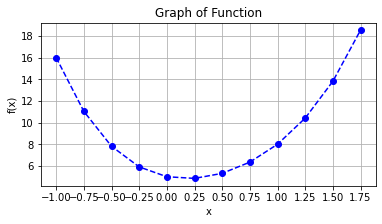

In [189]:
def f4(x):
    return x ** 4 - 2 * (x ** 3) + 6 * (x ** 2) - 2 * x + 5

plot(f4, np.arange(-1, 2, 0.25))
# total 4 roots, no real root

In [190]:
x1 = muller(f=f4, xr=0.1j, h=0.1, eps=0.00001, maxit=50)

iteration: 1, xr: (0.12782808197931758+0.9144474141188375j), fr: (1.07981037994018+0.630157881981253j), epsilon_a: 89.2866146053993
iteration: 2, xr: (0.033752733048353245+1.011091979588783j), fr: (0.05057001425608121+0.30832490381019095j), epsilon_a: 13.331773629730273
iteration: 3, xr: (-0.0012735526807227601+1.0015629174155791j), fr: (-0.01762146523736341-0.003931805636067098j), epsilon_a: 3.6242688824233897
iteration: 4, xr: (5.178153870185687e-06+0.9999986447430654j), fr: (3.155458674442002e-05+3.600405336467993e-05j), epsilon_a: 0.2020423867859876
iteration: 5, xr: (1.907161925358898e-10+1.0000000000179756j), fr: (6.190594703525676e-10+1.597632248717673e-09j), epsilon_a: 0.0005352389420185052
iteration: 6, xr: (-4.846827576126901e-18+1j), fr: 0j, epsilon_a: 1.915614587952901e-08
The approximate root is: (-4.846827576126901e-18+1j)


In [191]:
x2 = (abs(x1)) ** 2 / x1
x2

(-4.846827576126901e-18-1j)

In [195]:
x3 = muller(f=f4, xr=-10, h=0.1, eps=0.00001, maxit=50)

iteration: 1, xr: (-6.428785607196401-2.4848468247844617j), fr: (737.1316329520032+3028.490126031237j), epsilon_a: 63.123175372083104
iteration: 2, xr: (-5.162447742043505-3.007682149379237j), fr: (-538.5062939847842+1712.2612648133502j), epsilon_a: 22.930446097728378
iteration: 3, xr: (-3.7103553901649957-3.272108496593725j), fr: (-685.6349989354039+501.0471405912594j), epsilon_a: 29.835320181195797
iteration: 4, xr: (-2.339923121845347-3.3742853357925617j), fr: (-374.4368994410029-51.16132118759915j), epsilon_a: 33.467181103853974
iteration: 5, xr: (-1.3406469693151997-3.2483274138182905j), fr: (-124.12289974916825-127.26030088479541j), epsilon_a: 28.661125259931712
iteration: 6, xr: (-0.5286548699411512-3.014357898475496j), fr: (-7.90631072318504-80.70999844911435j), epsilon_a: 27.61201831457432
iteration: 7, xr: (0.09476723752295091-2.731453836876624j), fr: (19.602055074518027-30.53829181219742j), epsilon_a: 25.048843054435288
iteration: 8, xr: (0.5397202000486347-2.448197116560915

In [196]:
x4 = (abs(x3)) ** 2 / x3
x4

(1.000000000000001+2.000000000000001j)

In [197]:
# check the results using python library
coeff = [1, -2, 6, -2, 5]
np.roots(coeff)

array([ 1.00000000e+00+2.j,  1.00000000e+00-2.j, -7.63278329e-17+1.j,
       -7.63278329e-17-1.j])

3. Analsis

- Muller's methods
- easier to find real roots
- can be hard to define the initial guesses for the complex roots